## About data
The Carbon Catalogue is the carbon footprints of 866 commercial products from 145 companies, 8 industry sectors, 28 countries, and 5 continents.
Using data reported to CDP (Carbon Disclosure Project), where companies report their PCF (Product Carbon Footprint), this dataset is build. i.e., data
is build from environmental impact disclosures. The data consists of 866, PCFs from 145 companies, 30 industry groups, and 28 countries, showing trends of how upstream and downstream emissions vary by industry and how LCA aid companies to reduce Co2 throught a product's value chain.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


<span style="color:green; font-size:18px">🔵 New Code Block Added</span>


In [3]:
from sklearn.linear_model import RidgeCV
from scipy import sparse as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    mean_absolute_error, mean_absolute_percentage_error
)

In [4]:
Data = pd.read_csv("PublicTablesForCarbonCatalogueDataDescriptor_v30Oct2021(Product Level Data).csv", encoding='ISO-8859-1')

In [5]:
Data.shape

(866, 25)

In [6]:
Data.head(2)

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,57.50%,30.00%,12.50%,4.50%,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,57.50%,30.00%,12.50%,4.50%,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   *PCF-ID                                    866 non-null    object 
 1   Year of reporting                          866 non-null    int64  
 2   *Stage-level CO2e available                866 non-null    object 
 3   Product name (and functional unit)         866 non-null    object 
 4   Product detail                             856 non-null    object 
 5   Company                                    866 non-null    object 
 6   Country (where company is incorporated)    866 non-null    object 
 7   Company's GICS Industry Group              866 non-null    object 
 8   Company's GICS Industry                    866 non-null    object 
 9   *Company's sector                          866 non-null    object 
 10  Product weight (kg)       

In [8]:
# Drop specified columns 
Data.drop(Data.columns[[2, 4, 7, 8, 11, 13, 14, 15, 16, 17, 18, 22, 23, 24]], axis=1, inplace=True)


In [9]:
Data.head(2)

,*PCF-ID,Year of reporting,Product name (and functional unit),Company,Country (where company is incorporated),*Company's sector,Product weight (kg),"Product's carbon footprint (PCF, kg CO2e)",*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF)
0,10056-1-2014,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,Food & Beverage,0.7485,2.0,57.50%,30.00%,12.50%
1,10056-1-2015,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Kellogg Company,USA,Food & Beverage,0.7485,2.0,57.50%,30.00%,12.50%


## EDA

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Year of reporting', 'Product weight (kg)', "Product's carbon footprint (PCF, kg CO2e)"]

We have 8 categorical features : ['*PCF-ID', 'Product name (and functional unit)', 'Company', 'Country (where company is incorporated)', "*Company's sector", '*Upstream CO2e (fraction of total PCF)', '*Operations CO2e (fraction of total PCF)', '*Downstream CO2e (fraction of total PCF)']


In [11]:
print("Categories in 'Company' variable:     ",end=" " )
print(Data['Company'].unique())

Categories in 'Company' variable:      ['Kellogg Company' 'KNOLL INC' 'Konica Minolta, Inc.' 'Kuraray Co., Ltd.'
 'Lafarge S.A.' 'Levi Strauss & Co.' 'Lexmark International, Inc.'
 'LG Chem Ltd' 'LG Electronics' 'Logitech International SA'
 'Associated British Foods' 'MAGOTTEAUX' 'MediaTek' 'Autodesk, Inc.'
 'Miquel Y Costas' 'MITIE Group' 'Mitsubishi Gas Chemical Company, Inc.'
 'Mitsui Mining & Smelting Co., Ltd.' 'Molson Coors Brewing Company'
 'NEC Corporation' 'Nestlé' 'Nokia Group' 'OMRON Corporation'
 'Osaka Gas Co., Ltd.' 'PepsiCo, Inc.'
 'Philips & Lite-On Digital Solutions Corp.' 'Acbel Polytech Inc'
 'Quanta Storage Inc.' 'Qisda' 'BlackBerry Limited' 'Ricoh Co., Ltd.'
 'Sappi' 'Schneider Electric' 'Smurfit Kappa Group PLC' 'Solvay S.A.'
 'Staples, Inc.' 'Stanley Black & Decker, Inc.' 'Steelcase' 'Syngenta AG'
 'Tata Chemicals' 'Tata Steel' 'TETRA PAK' 'Bloomberg' 'Technicolor SA'
 'Toppan Printing Co., Ltd.' 'Trelleborg AB' 'Radius Systems'
 'Volkswagen AG' 'Waters Corporati

In [12]:
print(Data['Company'].value_counts())

Company
Daimler AG                     37
Steelcase                      36
Akzo Nobel                     35
Metsä Board                    31
Lexmark International, Inc.    29
                               ..
Wistron Corp                    1
HUMAX ELECTRONICS CO LTD        1
Maxxis International            1
Radius Systems                  1
CartOne S.r.l.                  1
Name: count, Length: 145, dtype: int64


In [13]:
print(Data['Country (where company is incorporated)'].value_counts())

Country (where company is incorporated)
USA               305
Japan             110
Germany            67
Taiwan             60
Finland            35
Netherlands        35
United Kingdom     32
Switzerland        28
Sweden             26
Italy              23
South Korea        22
France             20
Brazil             17
India              16
Spain              13
South Africa       11
Belgium             8
Ireland             6
Australia           6
Canada              6
China               6
Malaysia            4
Chile               3
Colombia            2
Luxembourg          2
Lithuania           1
Indonesia           1
Greece              1
Name: count, dtype: int64


## Feature Analysis

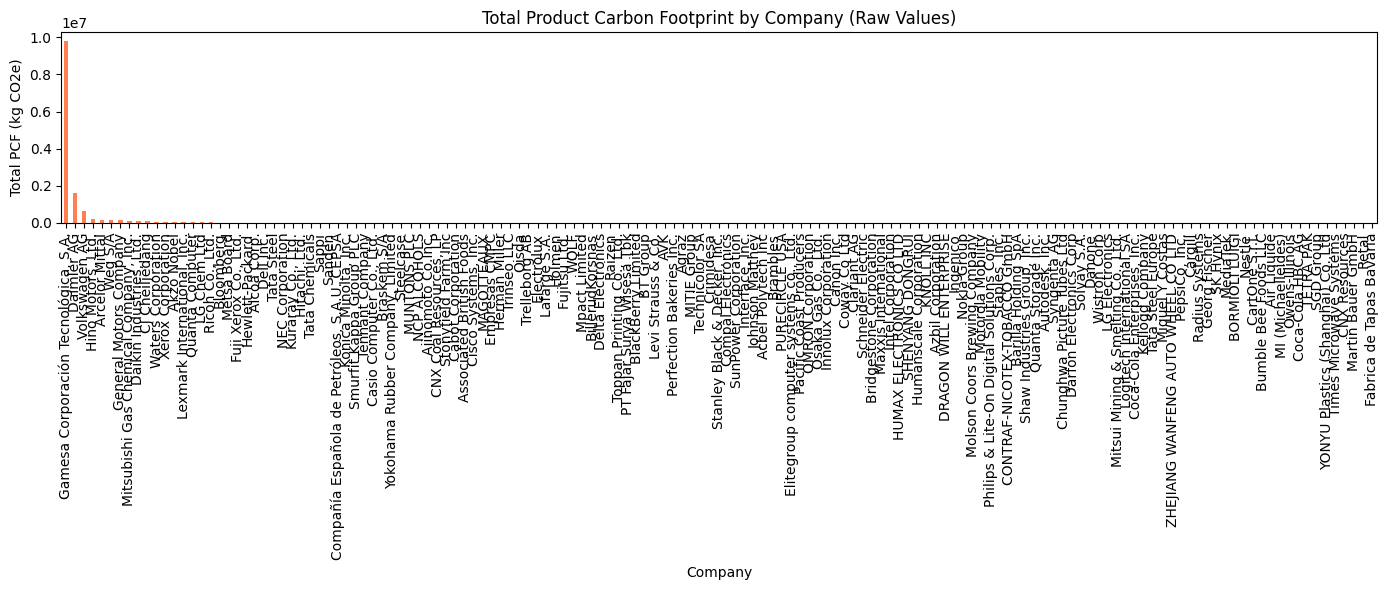

In [14]:
import matplotlib.pyplot as plt

# Aggregate total PCF per company using original values
company_pcf_raw = Data.groupby('Company')["Product's carbon footprint (PCF, kg CO2e)"].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 6))
company_pcf_raw.plot(kind='bar', color='coral')
plt.title("Total Product Carbon Footprint by Company (Raw Values)")
plt.xlabel("Company")
plt.ylabel("Total PCF (kg CO2e)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()                                                     

Notice that we see this chart after data preprocessing again.

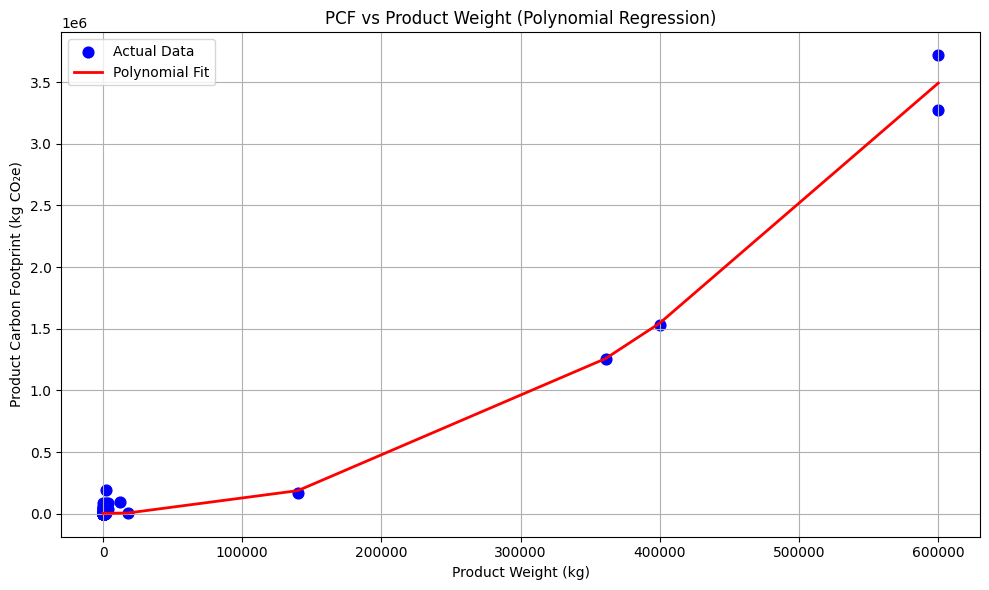

In [16]:
X = Data[['Product weight (kg)']]
y = Data["Product's carbon footprint (PCF, kg CO2e)"]

# Sort for smooth curve
sorted_data = Data.sort_values(by='Product weight (kg)')
X_sorted = sorted_data[['Product weight (kg)']]
y_sorted = sorted_data["Product's carbon footprint (PCF, kg CO2e)"]

# Polynomial regression (degree = 2 or 3 depending on curve)
poly = PolynomialFeatures(degree=2)   # change to 3 if needed
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predictions for smooth curve
X_sorted_poly = poly.transform(X_sorted)
y_poly_pred = model.predict(X_sorted_poly)

plt.figure(figsize=(10,6))

# Scatter real data
plt.scatter(X_sorted, y_sorted, color='blue', s=60, label='Actual Data')

# Polynomial curve
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Fit')

# Labels & style
plt.title("PCF vs Product Weight (Polynomial Regression)")
plt.xlabel("Product Weight (kg)")
plt.ylabel("Product Carbon Footprint (kg CO₂e)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
Data.describe()

,Year of reporting,Product weight (kg),"Product's carbon footprint (PCF, kg CO2e)"
count,866.000000,866.000000,8.660000e+02
mean,2014.762125,2806.548993,1.581525e+04
std,1.236720,34405.725655,1.813733e+05
min,2013.000000,0.001270,4.000000e-04
25%,2014.000000,1.000000,7.000000e+00
50%,2015.000000,15.899207,1.111000e+02
75%,2016.000000,1000.000000,1.600000e+03
max,2017.000000,600000.000000,3.718044e+06


## Outliers Detection

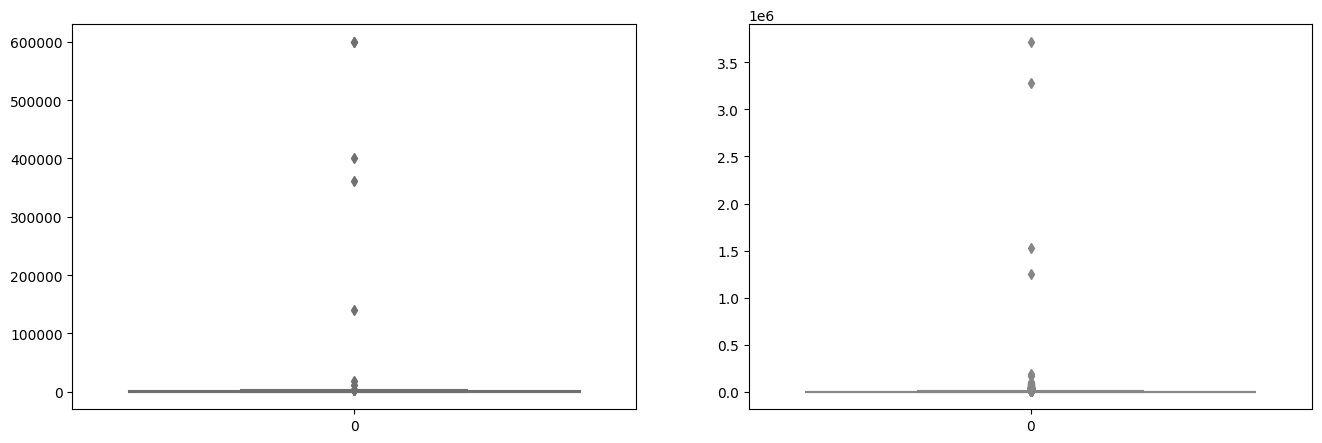

In [18]:
plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
sns.boxplot(Data['Product weight (kg)'],color='skyblue')
#sns.boxplot(x=Data['Product weight (kg)'],color='skyblue')
plt.subplot(122)
sns.boxplot(Data["Product's carbon footprint (PCF, kg CO2e)"],color='pink')
#sns.boxplot(x=Data["Product's carbon footprint (PCF, kg CO2e)"], color='pink')
plt.show()

In [19]:
# Define a function to detect outliers using IQR
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[[column]]

# Apply to both numerical columns
outliers_weight = get_outliers(Data, 'Product weight (kg)')
outliers_pcf = get_outliers(Data, "Product's carbon footprint (PCF, kg CO2e)")

# Display results
print("Outliers in Product weight (kg):")
print(outliers_weight)

print("\nOutliers in Product's carbon footprint (PCF, kg CO2e):")
print(outliers_pcf)

Outliers in Product weight (kg):
     Product weight (kg)
95               17736.0
97               12000.0
471             361000.0
472             400000.0
473             600000.0
474             600000.0
700               2500.0
702               3500.0
703               3500.0
706               2715.0
707               2595.0
708               2585.0
856             140000.0

Outliers in Product's carbon footprint (PCF, kg CO2e):
     Product's carbon footprint (PCF, kg CO2e)
6                                      10000.0
63                                      5846.0
64                                     10245.0
67                                      6309.0
68                                      4286.0
..                                         ...
842                                    39100.0
843                                    36386.0
846                                     9328.0
847                                   191687.0
856                                   167000

dropping 122 outliers from 866 records mean losing over 14% of data, which could distort model's learning.

## Data Cleaning by Log transfrom

In [20]:
# Apply log transformation (add small constant to avoid log(0))
Data['log_PCF'] = np.log1p(Data["Product's carbon footprint (PCF, kg CO2e)"])

In [21]:
#from scipy.stats.mstats import winsorize
#Data['Product weight (kg)'] = winsorize(Data['Product weight (kg)'], limits=[0.01, 0.01])
#Data["Product's carbon footprint (PCF, kg CO2e)"] = winsorize(Data["Product's carbon footprint (PCF, kg CO2e)"], limits=[0.01, 0.01])

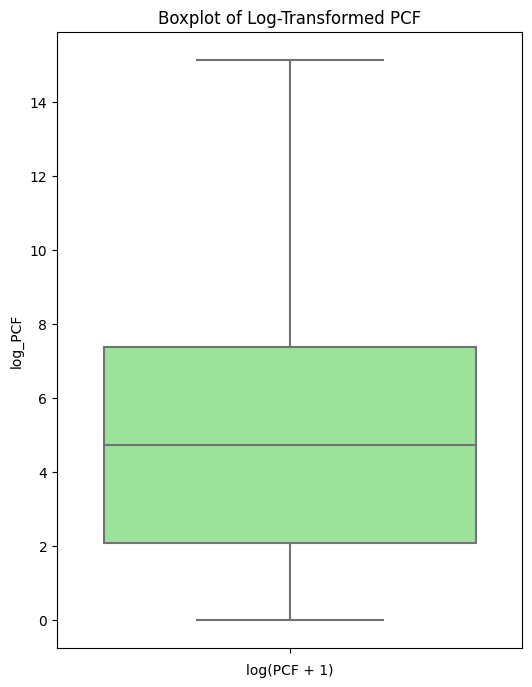

In [22]:
# Apply log transformation
Data['log_PCF'] = np.log1p(Data["Product's carbon footprint (PCF, kg CO2e)"])

# Create boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=Data['log_PCF'], color='lightgreen')
plt.title('Boxplot of Log-Transformed PCF')
plt.xlabel('log(PCF + 1)')
plt.show()

In [23]:
# Apply log transformation (add small constant to avoid log(0))
Data['log_Pw'] = np.log1p(Data["Product weight (kg)"])

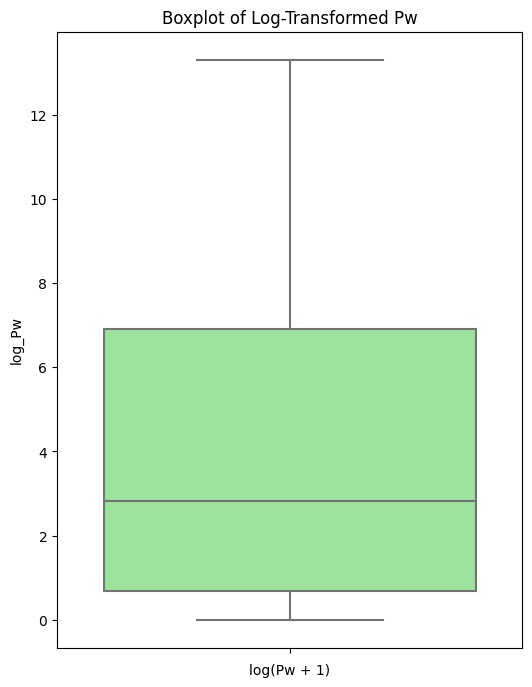

In [24]:
Data['log_Pw'] = np.log1p(Data["Product weight (kg)"])

# Create boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=Data['log_Pw'], color='lightgreen')
plt.title('Boxplot of Log-Transformed Pw')
plt.xlabel('log(Pw + 1)')
plt.show()

Update features after handling outliers

In [25]:
Data.drop(columns=['Product weight (kg)', "Product's carbon footprint (PCF, kg CO2e)"], inplace=True)

In [26]:
Data.rename(columns={'log_Pw': 'Product weight (kg)', 'log_PCF': "Product's carbon footprint (PCF, kg CO2e)"}, inplace=True)

In [27]:
numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']

In [28]:
Data.head(2)

,*PCF-ID,Year of reporting,Product name (and functional unit),Company,Country (where company is incorporated),*Company's sector,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),"Product's carbon footprint (PCF, kg CO2e)",Product weight (kg)
0,10056-1-2014,2014,Frosted Flakes(R) Cereal,Kellogg Company,USA,Food & Beverage,57.50%,30.00%,12.50%,1.098612,0.558758
1,10056-1-2015,2015,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Kellogg Company,USA,Food & Beverage,57.50%,30.00%,12.50%,1.098612,0.558758


In [30]:
numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']

## missing data

In [31]:
# Check for missing values in each column
missing_counts = Data.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Display result
print("Missing values per column:")
print(missing_counts)

Missing values per column:
Series([], dtype: int64)


## Duplicate data

In [32]:
# Count total duplicate rows
duplicate_count = Data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Optionally display the duplicate rows
if duplicate_count > 0:
    print("\nDuplicate rows:")
    display(Data[Data.duplicated()])

Number of duplicate rows: 0


In [33]:
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']

In [34]:
categorical_features

['*PCF-ID',
 'Product name (and functional unit)',
 'Company',
 'Country (where company is incorporated)',
 "*Company's sector",
 '*Upstream CO2e (fraction of total PCF)',
 '*Operations CO2e (fraction of total PCF)',
 '*Downstream CO2e (fraction of total PCF)']

In [35]:
# Loop through each categorical feature and display value counts
for feature in categorical_features:
    print(f"\nCategory counts for '{feature}':")
    print(Data[feature].value_counts())


Category counts for '*PCF-ID':
*PCF-ID
10056-1-2014     1
35311-6-2015     1
35311-12-2016    1
35311-2-2013     1
35311-2-2015     1
                ..
18585-3-2013     1
18585-3-2014     1
18585-3-2015     1
18585-3-2016     1
9792-2-2017      1
Name: count, Length: 866, dtype: int64

Category counts for 'Product name (and functional unit)':
Product name (and functional unit)
Average of all products sold to Braskem                          4
ColorQube 8870                                                   4
Tetra Brik® Aseptic Base 250ml                                   4
Tetra Brik® Aseptic Base 1000ml                                  4
Tetra Brik® Aseptic Slim 200ml                                   4
                                                                ..
ACQUITY® UPLC, ACQUITY® I-Class, ACQUITY® H-Class                1
Pressure transmitter (?????) GTX                                 1
Photoelectric sensor (??????)                                    1
Neosensor indoo

In [36]:
# Drop the specified columns
Data.drop(columns=[
    '*PCF-ID',
    'Product name (and functional unit)',
    '*Upstream CO2e (fraction of total PCF)',
    '*Operations CO2e (fraction of total PCF)',
    '*Downstream CO2e (fraction of total PCF)'
], inplace=True)

# Optional: check the updated DataFrame
print(Data.columns)

Index(['Year of reporting', 'Company',
       'Country (where company is incorporated)', '*Company's sector',
       'Product's carbon footprint (PCF, kg CO2e)', 'Product weight (kg)'],
      dtype='object')


In [37]:
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']

In [38]:
categorical_features

['Company', 'Country (where company is incorporated)', "*Company's sector"]

In [39]:
# Define the categorical columns of interest
categorical_columns = ['Company', 'Country (where company is incorporated)', "*Company's sector"]

# Print the number of unique values in each
for col in categorical_columns:
    print(f"Number of unique values in '{col}': {Data[col].nunique()}")

Number of unique values in 'Company': 145
Number of unique values in 'Country (where company is incorporated)': 28
Number of unique values in '*Company's sector': 8


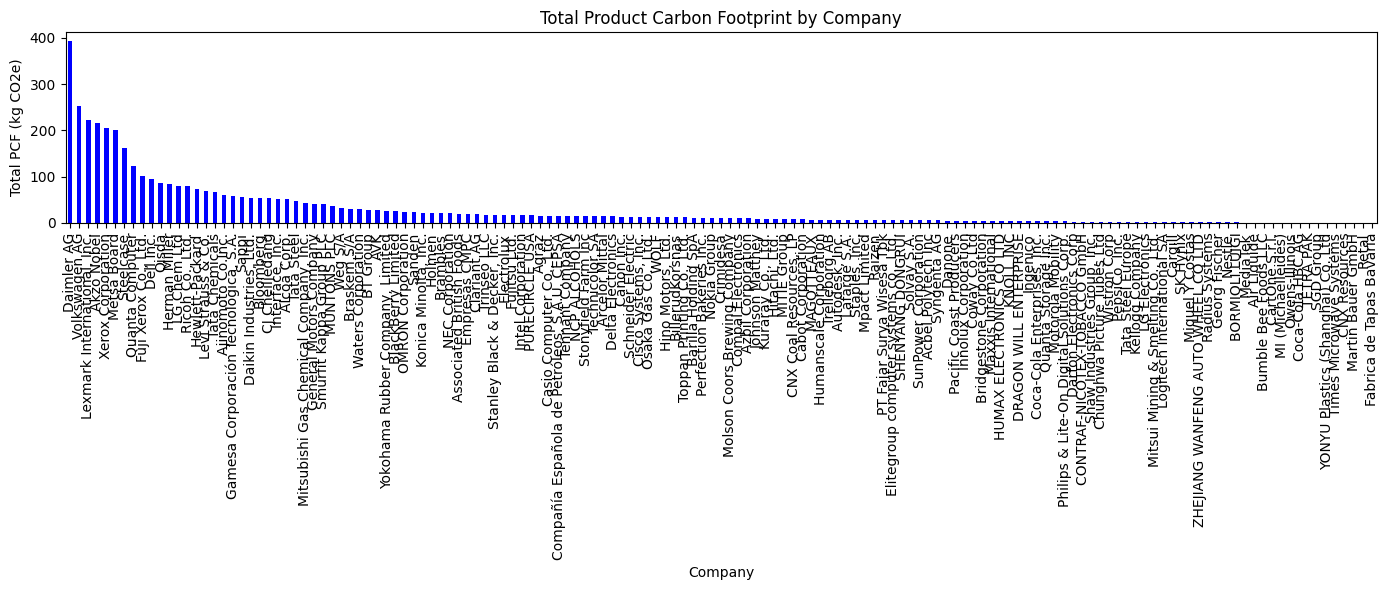

In [52]:
company_pcf_raw = Data.groupby('Company')["Product's carbon footprint (PCF, kg CO2e)"].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 6))
company_pcf_raw.plot(kind='bar', color='blue')
plt.title("Total Product Carbon Footprint by Company")
plt.xlabel("Company")
plt.ylabel("Total PCF (kg CO2e)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()  

For more innovative analysis, we have used Power BI tool in order to provide more sustainable solutions for the retail company.

## Split dataset

In [53]:
# Define features and target
X = Data.drop(columns=["Product's carbon footprint (PCF, kg CO2e)"])  # Replace with your actual target column name
y = Data["Product's carbon footprint (PCF, kg CO2e)"]  # Replace with your actual target column name

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (692, 5)
Testing set shape: (174, 5)


## Feature scaling

In [54]:
# Create transformer for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical features as-is
)

# Fit and transform training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [55]:
X_train_encoded

<692x175 sparse matrix of type '<class 'numpy.float64'>'
	with 3460 stored elements in Compressed Sparse Row format>

In [56]:
X_test_encoded

<174x175 sparse matrix of type '<class 'numpy.float64'>'
	with 860 stored elements in Compressed Sparse Row format>

## Model Training

In [57]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.4f}")

Linear Regression → R²: 0.9347, RMSE: 0.8343
Decision Tree → R²: 0.9395, RMSE: 0.8029
Random Forest → R²: 0.9536, RMSE: 0.7034
Gradient Boosting → R²: 0.9253, RMSE: 0.8923
SVR → R²: 0.0004, RMSE: 3.2630


Outcome. RF works here better than other models with the R square 0.9536

In [58]:
# ---- Scoring & CV ----
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"r2": "r2", "rmse": "neg_root_mean_squared_error"}  # RMSE is negative; higher is better (less negative)

# ---- Estimators & search spaces ----
search_spaces = {
    "Linear Regression": {
        "estimator": LinearRegression(),
        "params": {
            "fit_intercept": [True, False],
            # If multicollinearity/noise is an issue, consider swapping to Ridge/Lasso/ElasticNet.
        },
        "n_iter": 4
    },
    "Decision Tree": {
        "estimator": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [None, 5, 10, 20, 30],
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 4, 8],
            "max_features": [None, "sqrt", "log2", 0.5]
        },
        "n_iter": 30
    },
    "Random Forest": {
        "estimator": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "n_estimators": [200, 400, 800],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2", 0.5],
            "bootstrap": [True, False]
        },
        "n_iter": 40
    },
    "Gradient Boosting": {
        "estimator": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [200, 400, 800],
            "learning_rate": [0.01, 0.05, 0.1, 0.2],
            "max_depth": [2, 3, 4],
            "subsample": [0.6, 0.8, 1.0],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": [None, "sqrt", "log2"]
        },
        "n_iter": 40
    },
    "SVR": {
        # SVR strongly prefers scaled inputs
        "estimator": Pipeline([
            ("scaler", StandardScaler(with_mean=False) if hasattr(X_train_encoded, "toarray") else StandardScaler()),
            ("svr", SVR())
        ]),
        "params": {
            "svr__kernel": ["rbf"],
            "svr__C": [0.1, 1, 10, 100],
            "svr__epsilon": [0.01, 0.1, 1.0],
            "svr__gamma": ["scale"]  # ignored for linear kernel
        },
        "n_iter": 40
    }
}

# ---- Run hyperparameter search ----
best_models = {}
for name, cfg in search_spaces.items():
    print(f"\nTuning {name}...")
    search = RandomizedSearchCV(
        estimator=cfg["estimator"],
        param_distributions=cfg["params"],
        n_iter=cfg["n_iter"],
        scoring=scoring,
        refit="rmse",            # pick the model with best CV RMSE (i.e., most positive neg-RMSE)
        cv=cv,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )
    search.fit(X_train_encoded, y_train)
    best_models[name] = search.best_estimator_

    # Evaluate on test set
    y_pred = best_models[name].predict(X_test_encoded)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Best params for {name}: {search.best_params_}")
    print(f"CV best (neg-RMSE): {search.best_score_:.4f}")
    print(f"Test → R²: {r2:.4f}, RMSE: {rmse:.4f}")

# ---- (Optional) Compare all tuned models on the same line ----
print("\n=== Tuned model comparison on test set ===")
for name, model in best_models.items():
    y_pred = model.predict(X_test_encoded)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.4f}")


Tuning Linear Regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for Linear Regression: {'fit_intercept': False}
CV best (neg-RMSE): -0.8940
Test → R²: 0.9350, RMSE: 0.8324

Tuning Decision Tree...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20}
CV best (neg-RMSE): -1.0385
Test → R²: 0.9404, RMSE: 0.7969

Tuning Random Forest...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params for Random Forest: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30, 'bootstrap': True}
CV best (neg-RMSE): -0.8811
Test → R²: 0.9551, RMSE: 0.6915

Tuning Gradient Boosting...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params for Gradient Boosting: {'subsample': 0.6, 'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.1}
CV best (neg-RMSE): -0.8327
Test → R²: 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for SVR: {'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__epsilon': 0.01, 'svr__C': 100}
CV best (neg-RMSE): -3.2116
Test → R²: 0.0626, RMSE: 3.1599

=== Tuned model comparison on test set ===
Linear Regression → R²: 0.9350, RMSE: 0.8324
Decision Tree → R²: 0.9404, RMSE: 0.7969
Random Forest → R²: 0.9551, RMSE: 0.6915
Gradient Boosting → R²: 0.9522, RMSE: 0.7135
SVR → R²: 0.0626, RMSE: 3.1599


In [59]:
# Detect sparse input
is_sparse = sp.issparse(X_train_encoded)

def to_dense(X):
    return X.toarray() if sp.issparse(X) else X

models = {
    # Use RidgeCV (handles multicollinearity & stabilizes coefficients)
    "Ridge (Linear)": Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),  # needs dense
        ("ridge", RidgeCV(alphas=np.logspace(-6, 6, 13), fit_intercept=True))
    ]),

    "Decision Tree": DecisionTreeRegressor(
        max_depth=20, min_samples_split=2, min_samples_leaf=1,
        max_features=0.5, random_state=42
    ),

    "Random Forest": RandomForestRegressor(
        n_estimators=400, max_depth=30, min_samples_split=2,
        min_samples_leaf=1, max_features=0.5, bootstrap=True,
        n_jobs=-1, random_state=42
    ),

    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=800, learning_rate=0.1, max_depth=4,
        subsample=0.6, min_samples_split=2, min_samples_leaf=1,
        random_state=42
    ),

    "hgb": HistGradientBoostingRegressor(
        learning_rate=0.05, max_leaf_nodes=31, max_depth=4,
        min_samples_leaf=2, random_state=42
    ),

    # SVR benefits a lot from centering → densify so scaler can center
    "SVR": Pipeline([
        ("scaler", StandardScaler(with_mean=True, with_std=True)),  # requires dense
        ("svr", SVR(kernel="rbf", gamma="scale", epsilon=0.1, C=10.0))
    ]),
}

# Models that must receive DENSE inputs (because their pipelines center or the estimator requires it)
needs_dense = {"Ridge (Linear)", "SVR", "Gradient Boosting", "hgb"}

for name, model in models.items():
    Xtr = to_dense(X_train_encoded) if name in needs_dense else X_train_encoded
    Xte = to_dense(X_test_encoded)  if name in needs_dense else X_test_encoded

    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.4f}")


Ridge (Linear) → R²: 0.9312, RMSE: 0.8564
Decision Tree → R²: 0.9404, RMSE: 0.7969
Random Forest → R²: 0.9551, RMSE: 0.6915
Gradient Boosting → R²: 0.9529, RMSE: 0.7086
hgb → R²: 0.9256, RMSE: 0.8901
SVR → R²: 0.9228, RMSE: 0.9066


In [60]:
results = []

for name, model in models.items():
    Xtr = to_dense(X_train_encoded) if name in needs_dense else X_train_encoded
    Xte = to_dense(X_test_encoded)  if name in needs_dense else X_test_encoded

    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, rmse])

# Convert to DataFrame and sort
results_df = pd.DataFrame(results, columns=["Model", "R²", "RMSE"])
results_df = results_df.sort_values(by="R²", ascending=False)

print("\n=== Model Performance Ranking ===")
print(results_df.to_string(index=False))



=== Model Performance Ranking ===
            Model       R²     RMSE
    Random Forest 0.955108 0.691505
Gradient Boosting 0.952855 0.708646
    Decision Tree 0.940377 0.796920
   Ridge (Linear) 0.931153 0.856354
              hgb 0.925628 0.890052
              SVR 0.922832 0.906628


In [61]:
# Build a fresh preprocessor for NN (scale numerics + OHE categoricals)
nn_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [c for c in X_train.columns if c in numeric_features]),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=True), [c for c in X_train.columns if c in categorical_features])
    ],
    remainder='drop',     # keep only defined sets
    sparse_threshold=1.0  # keep sparse until we choose to densify
)

X_train_nn = nn_preprocessor.fit_transform(X_train)
X_test_nn  = nn_preprocessor.transform(X_test)

# Keras Dense layers need dense arrays → densify (OK for most tabular sets).
# If this is too large for memory, see the "Embeddings route" at the end.
if sp.issparse(X_train_nn):
    X_train_nn = X_train_nn.toarray()
    X_test_nn  = X_test_nn.toarray()

X_train_nn = X_train_nn.astype('float32')
X_test_nn  = X_test_nn.astype('float32')

y_train_nn = y_train.values.astype('float32') if hasattr(y_train, "values") else y_train.astype('float32')
y_test_nn  = y_test.values.astype('float32')  if hasattr(y_test, "values") else y_test.astype('float32')

X_train_nn.shape, X_test_nn.shape


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((692, 175), (174, 175))

In [62]:
!pip install tensorflow --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## MLP

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

input_dim = X_train_nn.shape[1]

def build_mlp(input_dim: int, l2=1e-6, dropout=0.2):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(),
        layers.Dropout(dropout),

        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(),
        layers.Dropout(dropout),

        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.BatchNormalization(),

        layers.Dense(1)  # regression
    ])
    return model

model = build_mlp(input_dim, l2=1e-6, dropout=0.2)
opt = optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'), 'mae'])

es = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-5)

history = model.fit(
    X_train_nn, y_train_nn,
    validation_data=(X_test_nn, y_test_nn),
    epochs=200,
    batch_size=256,
    callbacks=[es, rlr],
    verbose=1
)

# Evaluate
pred_nn = model.predict(X_test_nn).ravel()
r2_nn   = r2_score(y_test_nn, pred_nn)
rmse_nn = mean_squared_error(y_test_nn, pred_nn, squared=False)
mae_nn  = mean_absolute_error(y_test_nn, pred_nn)

print(f"Neural Net → R²: {r2_nn:.4f}, RMSE: {rmse_nn:.4f}, MAE: {mae_nn:.4f}")


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - loss: 33.2169 - mae: 4.9588 - rmse: 5.7601 - val_loss: 31.8687 - val_mae: 4.7290 - val_rmse: 5.6452 - learning_rate: 0.0010
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - loss: 26.7670 - mae: 4.8425 - rmse: 5.1732 - val_loss: 31.3772 - val_mae: 4.6834 - val_rmse: 5.6015 - learning_rate: 0.0010
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 24.9832 - mae: 4.8308 - rmse: 4.9980 - val_loss: 31.2256 - val_mae: 4.6472 - val_rmse: 5.5879 - learning_rate: 0.0010
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - loss: 23.9790 - mae: 4.7286 - rmse: 4.8966 - val_loss: 30.8100 - val_mae: 4.6101 - val_rmse: 5.5506 - learning_rate: 0.0010
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - loss: 23.7176 - mae: 4.7428 - rmse: 4.8698 - val_loss: 30.1126 - val_mae: 4.5649 - val_rmse: 5.4874 - learning_rate: 0.0010
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step - loss: 22.4526 - mae: 4.6341 - rmse: 4.7380 - val_loss: 29.3785 -